# 1. Importing libraries and loading Data

### 1.1 Installing necessary libraries

In [ ]:
%pip install matplotlib
%pip install pandas
%pip install numpy

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import animation as anim
import seaborn as sns

from scipy import spatial
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### 1.2 Loading data

In [2]:
df = pd.read_csv('./data/60Activities-poseData.csv')
df.head()

,name,xX_left_shoulder,yY_left_shoulder,zZ_left_shoulder,xX_right_shoulder,yY_right_shoulder,zZ_right_shoulder,xX_left_elbow,yY_left_elbow,zZ_left_elbow,...,zZ_left_knee,xX_right_knee,yY_right_knee,zZ_right_knee,xX_left_ankle,yY_left_ankle,zZ_left_ankle,xX_right_ankle,yY_right_ankle,zZ_right_ankle
0,angled leg presses,"[0.6244075298309326, 0.6202492713928223, 0.625...","[0.6125868558883667, 0.6116636991500854, 0.614...","[-0.7317232489585876, -0.7084757089614868, -0....","[0.7274216413497925, 0.7407364845275879, 0.745...","[0.5923414826393127, 0.607475757598877, 0.6018...","[-0.2771779000759125, -0.31190672516822815, -0...","[0.45598286390304565, 0.4522373676300049, 0.45...","[0.7025633454322815, 0.7008029818534851, 0.700...","[-0.8455376625061035, -0.7739219665527344, -0....",...,"[-0.18987344205379486, -0.0501105897128582, -0...","[0.3456818461418152, 0.35185500979423523, 0.37...","[0.4793410003185272, 0.48256415128707886, 0.48...","[0.25488728284835815, 0.33376675844192505, 0.3...","[0.06234923005104065, 0.05919414758682251, 0.0...","[0.36329522728919983, 0.3608418405056, 0.36984...","[-0.06779885292053223, 0.08755621314048767, 0....","[0.24116382002830505, 0.23082193732261658, 0.2...","[0.3432755172252655, 0.34823083877563477, 0.34...","[0.41889476776123047, 0.49117857217788696, 0.4..."
1,arnold press,"[0.6750805377960205, 0.6730958819389343, 0.674...","[0.3685726225376129, 0.36425328254699707, 0.36...","[-0.023685937747359276, -0.028867069631814957,...","[0.47216328978538513, 0.47299060225486755, 0.4...","[0.3719647526741028, 0.368996262550354, 0.3686...","[-0.08193735778331757, -0.10326733440160751, -...","[0.6953715085983276, 0.6981197595596313, 0.706...","[0.4491013288497925, 0.44966304302215576, 0.45...","[-0.3566053807735443, -0.35106605291366577, -0...",...,"[-0.6593864560127258, -0.6449337601661682, -0....","[0.48968997597694397, 0.48874959349632263, 0.4...","[0.6085264682769775, 0.6103435158729553, 0.610...","[-0.8127835988998413, -0.8063545227050781, -0....","[0.7018957734107971, 0.7013241052627563, 0.701...","[0.742508590221405, 0.7433649301528931, 0.7421...","[-0.3053855001926422, -0.27191391587257385, -0...","[0.48945480585098267, 0.48833632469177246, 0.4...","[0.7392826080322266, 0.739270806312561, 0.7423...","[-0.3828478753566742, -0.3595616817474365, -0...."
2,back extensions,"[0.24804607033729553, 0.26040884852409363, 0.2...","[0.4517459571361542, 0.45352500677108765, 0.45...","[-0.3853210508823395, -0.37524843215942383, -0...","[0.23037508130073547, 0.23251590132713318, 0.2...","[0.4661741554737091, 0.46856704354286194, 0.47...","[0.28441742062568665, 0.28328651189804077, 0.2...","[0.37875789403915405, 0.3819432854652405, 0.38...","[0.4680253565311432, 0.4703821539878845, 0.469...","[-0.6757698059082031, -0.6794125437736511, -0....",...,"[-0.2013997733592987, -0.18110059201717377, -0...","[0.6978815793991089, 0.7043741941452026, 0.700...","[0.6545929908752441, 0.6574983596801758, 0.661...","[0.45003992319107056, 0.41382306814193726, 0.4...","[0.9378144145011902, 0.9393232464790344, 0.940...","[0.7470904588699341, 0.743262529373169, 0.7441...","[-0.1447303295135498, -0.076068215072155, -0.0...","[0.8562198877334595, 0.8520399332046509, 0.866...","[0.7071706056594849, 0.7047874331474304, 0.709...","[0.7344235777854919, 0.7165142893791199, 0.722..."
3,back presses,"[0.5400533080101013, 0.5398567914962769, 0.539...","[0.30235743522644043, 0.3022450804710388, 0.30...","[0.18136030435562134, 0.18636830151081085, 0.1...","[0.4811861217021942, 0.48017001152038574, 0.47...","[0.3090822100639343, 0.30989527702331543, 0.30...","[-0.02199406921863556, -0.012855282053351402, ...","[0.5700136423110962, 0.5703814625740051, 0.570...","[0.24835893511772156, 0.24547149240970612, 0.2...","[0.2516632080078125, 0.24780821800231934, 0.26...",...,"[-0.11309728771448135, -0.12462121993303299, -...","[0.5247339606285095, 0.5247664451599121, 0.525...","[0.5397233366966248, 0.543906033039093, 0.5451...","[-0.4834393858909607, -0.48

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               60 non-null     object
 1   xX_left_shoulder   60 non-null     object
 2   yY_left_shoulder   60 non-null     object
 3   zZ_left_shoulder   60 non-null     object
 4   xX_right_shoulder  60 non-null     object
 5   yY_right_shoulder  60 non-null     object
 6   zZ_right_shoulder  60 non-null     object
 7   xX_left_elbow      60 non-null     object
 8   yY_left_elbow      60 non-null     object
 9   zZ_left_elbow      60 non-null     object
 10  xX_right_elbow     60 non-null     object
 11  yY_right_elbow     60 non-null     object
 12  zZ_right_elbow     60 non-null     object
 13  xX_left_wrist      60 non-null     object
 14  yY_left_wrist      60 non-null     object
 15  zZ_left_wrist      60 non-null     object
 16  xX_right_wrist     60 non-null     object
 17 

### 1.3 Preprocessing

Converting each row in the column to a list of floats. This is done by using the split function on the string and then converting each element to a float.

In [4]:
for columns in df.columns[1:]:
    df[columns] = df[columns].apply(lambda x: [float(i) for i in x.strip('[]').split(',')])

This dictionary is used to map the activity name to a value.


In [5]:
poses = dict(df['name'])
poses

{0: 'angled leg presses',
 1: 'arnold press',
 2: 'back extensions',
 3: 'back presses',
 4: 'bar triceps extensions',
 5: 'barbell bench press',
 6: 'barbell curls',
 7: 'barbell front raise',
 8: 'barbell lunge',
 9: 'bench jump',
 10: 'bench presses',
 11: 'bent over row',
 12: 'brbell shrugs',
 13: 'cable crossover flys',
 14: 'chin-ups',
 15: 'close-grip bench presses',
 16: 'concentration curls',
 17: 'crunches',
 18: 'deadlifts',
 19: 'dumbbell flys',
 20: 'dumbbell lunges',
 21: 'dumbbell press',
 22: 'dumbbell presses',
 23: 'dumbbell pullovers',
 24: 'dumbbell scarecrow',
 25: 'dumbbell shrugs',
 26: 'dumbbell triceps extension',
 27: 'front raises',
 28: 'hack squats',
 29: 'hanging leg raises',
 30: 'incline bench sit-ups',
 31: 'incline presses',
 32: 'lat pull-downs',
 33: 'lateral raises',
 34: 'leg extensions',
 35: 'low pulley cable crossover',
 36: 'low pulley front raises',
 37: 'low-pulley lateral raises',
 38: 'one-arm dumbbell rows',
 39: 'one-arm dumbbell triceps

<b>CHANGE POSE HERE</b> 



In [6]:
pose = 9 

# 2. Visualization

Each row is a pose and each column is either x, y, or z coordinates for the joint of interest. The coordinates are stored in a list as a time series, where each element in the list is the coordinate for a particular time.

To visualize each pose in 3D space, I will first plot points joint by joint and then iterate through the time series to update the plot creating a GIF.

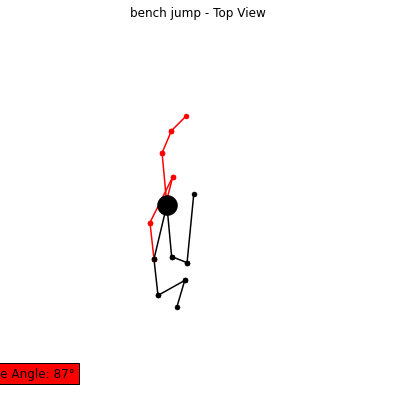

In [140]:
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')

def animate(i):
    """
    This function is called every frame and updates the plot.
    The first argument is the current frame number.
    """

    ax.clear()

    ## left shoulder and left elbow
    ax.plot(
        [df['xX_left_shoulder'][pose][i], df['xX_left_elbow'][pose][i]],
        [df['yY_left_shoulder'][pose][i], df['yY_left_elbow'][pose][i]], 
        [df['zZ_left_shoulder'][pose][i], df['zZ_left_elbow'][pose][i]], marker='o', color='black', label='left_wrist', markersize=5, markeredgewidth=0.5)

    ## left elbow and left wrist
    ax.plot(
        [df['xX_left_elbow'][pose][i], df['xX_left_wrist'][pose][i]],
        [df['yY_left_elbow'][pose][i], df['yY_left_wrist'][pose][i]],
        [df['zZ_left_elbow'][pose][i], df['zZ_left_wrist'][pose][i]], marker='o', color='black', label='left_wrist', markersize=5, markeredgewidth=0.5)

    ## right shoulder and right elbow
    ax.plot(
        [df['xX_right_shoulder'][pose][i], df['xX_right_elbow'][pose][i]],
        [df['yY_right_shoulder'][pose][i], df['yY_right_elbow'][pose][i]],
        [df['zZ_right_shoulder'][pose][i], df['zZ_right_elbow'][pose][i]], marker='o', color='red', label='right_wrist', markersize=5, markeredgewidth=0.5)

    ## right elbow and right wrist
    ax.plot(
        [df['xX_right_elbow'][pose][i], df['xX_right_wrist'][pose][i]],
        [df['yY_right_elbow'][pose][i], df['yY_right_wrist'][pose][i]],
        [df['zZ_right_elbow'][pose][i], df['zZ_right_wrist'][pose][i]], marker='o', color='red', label='right_wrist', markersize=5, markeredgewidth=0.5)

    ## Head
    x = (df['xX_left_shoulder'][pose][i] + df['xX_right_shoulder'][pose][i])/2
    y = (df['yY_right_shoulder'][pose][i] + df['yY_left_shoulder'][pose][i])/2
    z = (df['zZ_right_shoulder'][pose][i] + df['zZ_left_shoulder'][pose][i])/2

    ## Hip
    x_hip = (df['xX_left_hip'][pose][i] + df['xX_right_hip'][pose][i])/2
    y_hip = (df['yY_right_hip'][pose][i] + df['yY_left_hip'][pose][i])/2
    z_hip = (df['zZ_right_hip'][pose][i] + df['zZ_left_hip'][pose][i])/2

    ## left shoulder and head
    ax.plot(
        [df['xX_left_shoulder'][pose][i], x],
        [df['yY_left_shoulder'][pose][i], y],
        [df['zZ_left_shoulder'][pose][i], z], marker='o', color='black', label='left_shoulder', markersize=5, markeredgewidth=0.5)

    ## right shoulder and head
    ax.plot(
        [df['xX_right_shoulder'][pose][i], x],
        [df['yY_right_shoulder'][pose][i], y],
        [df['zZ_right_shoulder'][pose][i], z], marker='o', color='red', label='right_shoulder', markersize=5, markeredgewidth=0.5)

    ## Left hip and left knee
    ax.plot(
        [df['xX_left_hip'][pose][i], df['xX_left_knee'][pose][i]],
        [df['yY_left_hip'][pose][i], df['yY_left_knee'][pose][i]],
        [df['zZ_left_hip'][pose][i], df['zZ_left_knee'][pose][i]], marker='o', color='black', label='left_wrist', markersize=5, markeredgewidth=0.5)

    ax.plot(
        [df['xX_left_knee'][pose][i], df['xX_left_ankle'][pose][i]],
        [df['yY_left_knee'][pose][i], df['yY_left_ankle'][pose][i]],
        [df['zZ_left_knee'][pose][i], df['zZ_left_ankle'][pose][i]], marker='o', color='black', label='left_wrist', markersize=5, markeredgewidth=0.5)

    ## right hip to right knee
    ax.plot(
        [df['xX_right_hip'][pose][i], df['xX_right_knee'][pose][i]],
        [df['yY_right_hip'][pose][i], df['yY_right_knee'][pose][i]],
        [df['zZ_right_hip'][pose][i], df['zZ_right_knee'][pose][i]], marker='o', color='red', label='right_wrist', markersize=5, markeredgewidth=0.5)

    ax.plot(
        [df['xX_right_knee'][pose][i], df['xX_right_ankle'][pose][i]],
        [df['yY_right_knee'][pose][i], df['yY_right_ankle'][pose][i]],
        [df['zZ_right_knee'][pose][i], df['zZ_right_ankle'][pose][i]], marker='o', color='red', label='right_wrist', markersize=5, markeredgewidth=0.5)

    ## left hip to right hip
    ax.plot(
        [df['xX_left_hip'][pose][i], x_hip],
        [df['yY_left_hip'][pose][i], y_hip],
        [df['zZ_left_hip'][pose][i], z_hip], marker='o', color='black', label='left_hip', markersize=5, markeredgewidth=0.5)

    ax.plot(
        [df['xX_right_hip'][pose][i], x_hip],
        [df['yY_right_hip'][pose][i], y_hip],
        [df['zZ_right_hip'][pose][i], z_hip], marker='o', color='red', label='right_hip', markersize=5, markeredgewidth=0.5)

    plt.plot([x], [y], [z], marker='o', color='black', linestyle='dashed', label='head', markersize=20, markeredgewidth=0.5)

    ## Spine
    ax.plot(
        [x_hip, x],
        [y_hip, y],
        [z_hip, z], marker='o', color='black', label='spine', markersize=5, markeredgewidth=0.5)

    ax.axis('off')
    ax.title.set_text(f'{(poses[pose])} - Top View')
    ax.set_xlim([-1, 1])
    ax.view_init(elev=10., azim=85)

    
    spine_yz = np.array([0, np.linalg.norm(y_hip - y), np.linalg.norm(z_hip - z)])
    plane_yz = np.array([0, 1, 1])

    dist = spatial.distance.cosine(spine_yz, plane_yz)
    spine_angle = np.arccos(dist)
    spine_angle = spine_angle * (180/np.pi)
    _ = ax.text(1.5, -0.8, 0.6, f'Spine Angle: {spine_angle:.0f}°', bbox=dict(facecolor='red'), fontsize=12, transform=ax.transAxes)

frames = 60
gif = anim.FuncAnimation(fig, animate, frames=frames, interval=1)
gif.save(f'{df["name"][pose]}.gif', fps=100, dpi=100, bitrate=2000, writer='pillow')


# 3. Dimension Reduction

In this section I will use one dimension reduction algorithms to reduce the dimensionality of the dataset.

- Principal Component Analysis

### 3.1 Preparing data for Dimension Reduction

In [7]:
df_copy = df
df = df.drop(columns=['name'])

Check for normalization 

In [8]:
for row in range(len(df)):
    for column in range(len(df.columns)):
        a = df.iloc[row, column] ## a is list of values at [row, column]
        a_max = np.max(a) ## Find max value in list
        a_min = np.min(a) ## Find min value in list

        if row % 3 == 0:
            ## if max value is greater than 1 or min value is less than 0 then data is not normalized
            if a_max > 1 or a_min < -1:
                print(f'Max: {a_max}, Min: {a_min}')

Max: 0.42543840408325195, Min: -1.030681848526001
Max: 1.0305320024490356, Min: 0.2891605794429779
Max: 0.5657778978347778, Min: -1.0185914039611816
Max: 1.1450251340866089, Min: -0.19838504493236542
Max: 1.0839275121688843, Min: 0.16964873671531677
Max: -0.45642319321632385, Min: -1.1856335401535034
Max: -0.8146106004714966, Min: -1.9661659002304077
Max: 1.1054261922836304, Min: -1.1708649396896362
Max: -0.6895114183425903, Min: -1.3624151945114136
Max: -0.4448922276496887, Min: -1.478563666343689
Max: 0.2772601842880249, Min: -1.077445149421692
Max: -0.04197615757584572, Min: -1.6366550922393799
Max: 0.48650139570236206, Min: -1.677490472793579
Max: -0.15885937213897705, Min: -1.0399234294891357


The data is scaled. There are values that are greater than 1 and, less than -1 but not by that much, so we need not need scale the data first before Decomposition.

To start working with the data, I need to compress each row/column time series into a single number without losing information.
I will use the mean of the row/column time series as the value for that row/column.

In [9]:
for row in range(len(df)):
    for column in range(len(df.columns)):
        df.iloc[row, column] = np.mean(df.iloc[row, column])

In [10]:
df = pd.concat([df, df_copy['name']], axis=1) ## Adding name column back to dataframe
df.head(2)

,xX_left_shoulder,yY_left_shoulder,zZ_left_shoulder,xX_right_shoulder,yY_right_shoulder,zZ_right_shoulder,xX_left_elbow,yY_left_elbow,zZ_left_elbow,xX_right_elbow,...,xX_right_knee,yY_right_knee,zZ_right_knee,xX_left_ankle,yY_left_ankle,zZ_left_ankle,xX_right_ankle,yY_right_ankle,zZ_right_ankle,name
0,0.5937,0.623749,-0.55695,0.674819,0.62079,-0.176736,0.435724,0.691084,-0.625844,0.551158,...,0.410476,0.499677,0.141257,0.221268,0.393444,0.027171,0.238934,0.402323,0.249195,angled leg presses
1,0.662998,0.361014,-0.137118,0.455092,0.360198,0.095566,0.734496,0.359591,-0.515246,0.367433,...,0.364221,0.618698,-0.776021,0.610646,0.776683,-0.531914,0.398183,0.760961,-0.337034,arnold press


### 3.2 Principal Components Analysis

To reduce dimensionality of time series data

In [11]:
X = df.drop(columns=['name'])

In [12]:
pca = PCA(n_components = 0.95)
pca.fit(X)
reduced = pca.transform(X)

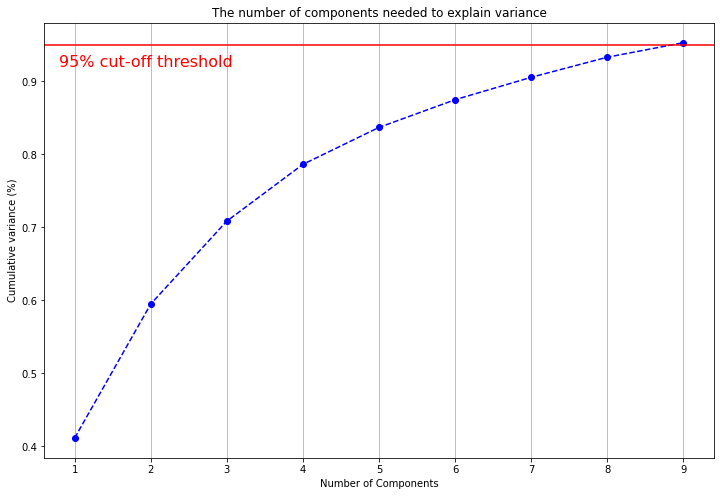

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))

y = np.cumsum(pca.explained_variance_ratio_)
xi = np.arange(1, 10, step=1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 10, step=1)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.80, 0.92, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

Applying PCA with 9 dimensions to capture 95% variance

In [14]:
pca = PCA(n_components = 9)
pca.fit(X)
reduced_pca = pca.transform(X)

print(f'Explained Variance: {pca.explained_variance_ratio_}')
print(f'Explained Variance Ratio: {pca.explained_variance_ratio_.sum()}')
print(f'Noise Variance: {1 - pca.explained_variance_ratio_.sum()}')

## Create new dataframe with reduced data
reduced_pca = pd.DataFrame(reduced_pca)
reduced_pca.columns = ['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8', 'PCA_9'] 
reduced_pca['name'] = df_copy['name'] ## Adding name column back to dataframe
reduced_pca.head(2)

Explained Variance: [0.41150448 0.18349391 0.11353518 0.07774852 0.05057849 0.03793956
 0.03067664 0.02751509 0.01988937]
Explained Variance Ratio: 0.9528812579710287
Noise Variance: 0.04711874202897126


,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,name
0,-0.482588,0.025568,-0.686573,0.742593,-0.367238,0.157487,0.170008,-0.132087,0.057673,angled leg presses
1,-0.351387,1.459556,0.398974,0.012319,0.087272,-0.078215,-0.043309,0.057923,-0.171997,arnold press


## 4. Clustering

### 3.4 KMeans

Choosing the best k with Elbow method

In [15]:
reduced_pca.drop(columns=['name'], inplace=True) ## Drop name column

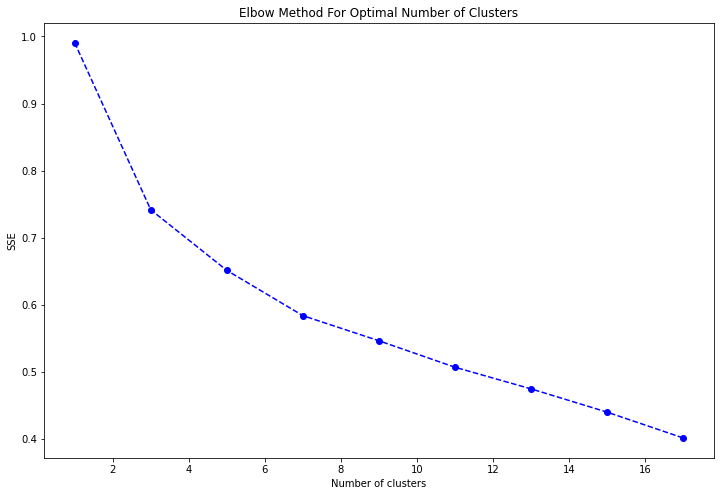

In [24]:
sse = []

for k in range(1, 19, 2):
    kmean = KMeans(n_clusters=k, random_state=42)
    pred = kmean.fit_predict(reduced_pca)
    centroids = kmean.cluster_centers_

    sse.append(np.sum(np.min(spatial.distance.cdist(reduced_pca, centroids, 'euclidean'), axis=1)) / X.shape[0])

fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(1, 19, 2)
plt.plot(x, sse, marker='o', linestyle='--', color='b')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


Silhouette Score: 0.23


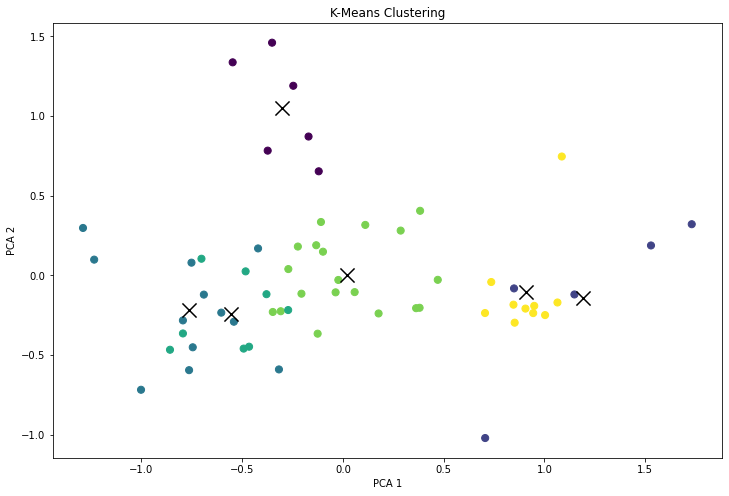

In [25]:
kmean = KMeans(n_clusters=6, random_state=42)
pred = kmean.fit_predict(reduced_pca)
centroids = kmean.cluster_centers_

score = silhouette_score(reduced_pca, kmean.labels_, metric='euclidean')
print(f'Silhouette Score: {score:.2f}')

fig = plt.figure(figsize=(12, 8))
plt.scatter(reduced_pca['PCA_1'], reduced_pca['PCA_2'], c=kmean.labels_, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, marker='x')
plt.title('K-Means Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()